### Importacion de paquetes y base de datos



**PAQUETES Y SUS FUNCIONES:**

**pandas (importado como pd):**

Se utiliza para manipular y analizar datos tabulares, como hojas de cálculo o bases de datos.

**numpy (importado como np):**

NumPy es una biblioteca fundamental para la computación numérica en Python. Proporciona soporte para arreglos multidimensionales y operaciones matemáticas eficientes en estos arreglos.

**matplotlib.pyplot (importado como plt):**

Matplotlib es una biblioteca de visualización en Python. pyplot es una interfaz que permite crear gráficos y visualizaciones. Se usa comúnmente para trazar datos y crear gráficos.

**statsmodels.graphics.tsaplots (importado como sgt):**

Statsmodels es una biblioteca que proporciona herramientas estadísticas y modelos para el análisis de series temporales. El módulo tsaplots dentro de Statsmodels contiene herramientas para crear gráficos relacionados con el análisis de series temporales, como funciones de autocorrelación.

**statsmodels.tsa.stattools (importado como sts):**

Este módulo de Statsmodels contiene herramientas para realizar pruebas estadísticas y análisis en series temporales, como pruebas de raíz unitaria y pruebas de autocorrelación.

**statsmodels.tsa.seasonal:**

Statsmodels ofrece una funcionalidad de descomposición estacional que permite descomponer una serie temporal en sus componentes de tendencia, estacionalidad y residuales.

**seaborn (importado como sns):**

Seaborn es una biblioteca de visualización de datos que se basa en Matplotlib y proporciona una interfaz más agradable y opciones de estilo para crear gráficos estadísticos. Se utiliza para mejorar la apariencia de los gráficos y realizar visualizaciones más atractivas y efectivas.

**sns.set():**

Esto configura el estilo predeterminado de Seaborn para que se aplique a las visualizaciones. sns.set() se utiliza para establecer un estilo de trazado específico proporcionado por Seaborn, lo que puede mejorar la apariencia de los gráficos generados con Seaborn.



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()



*   **raw_csv_data = pd.read_csv("df_comp (1).csv"):**

Esta línea carga los datos desde el archivo CSV "df_comp (1).csv" en un DataFrame de Pandas llamado raw_csv_data. El DataFrame contendrá los datos tal como están en el archivo CSV.

* **df_comp = raw_csv_data.copy():**

Se crea una copia del DataFrame original raw_csv_data y se almacena en la variable df_comp. Esto se hace para que puedas trabajar con la copia sin afectar el DataFrame original.

* **df_comp["date"] = pd.to_datetime(df_comp["date"], dayfirst=True):**

Esta línea convierte la columna "date" en el DataFrame df_comp en objetos de tipo datetime. El argumento dayfirst=True se utiliza para indicar que el formato de fecha en los datos es día-mes-año.

**df_comp.set_index("date", inplace=True):**

Establece la columna "date" como el índice del DataFrame df_comp. Esto se hace para que los datos estén indexados por fechas, lo que facilita el análisis de series temporales.

**df_comp = df_comp.asfreq('b'):**

Este código establece la frecuencia de los datos como "b", que representa días laborables (días hábiles). Esto significa que si faltan datos en un día laborable, se rellenarán con valores NaN (no disponibles).

**df_comp = df_comp.fillna(method='ffill'):**

Esta línea rellena los valores faltantes en el DataFrame utilizando el método de "forward fill" (rellenar hacia adelante). Esto significa que cualquier valor faltante se reemplazará con el valor anterior en la serie temporal. Esto es común en el análisis de series temporales cuando se trata de datos faltantes en días laborables.


In [17]:
raw_csv_data = pd.read_csv("df_comp (1).csv")
df_comp = raw_csv_data.copy()
df_comp["date"] = pd.to_datetime(df_comp["date"], dayfirst=True)
df_comp.set_index("date", inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')



### Removing Surplus Data

Se crea una nueva columna en el DataFrame df_comp llamada "market_value" y le asigna los valores de la columna existente llamada "spx ".

In [19]:
df_comp = df_comp.assign(market_value=df_comp['spx '])

Los codigos "del" permiten eliminar dichas columnas, De tal manera que solo se conserva market_value.

 **size = int(len(df_comp)*0.8):**

Calcula el tamaño del conjunto de datos de entrenamiento, que corresponde al 80% de la longitud total de df_comp. El resultado se almacena en la variable size.

**df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]:**

Divide el DataFrame df_comp en dos DataFrames separados, df y df_test, utilizando la variable size para definir el punto de división. df contendrá el 80% de los datos iniciales, que se utilizan para entrenar modelos u otros análisis, y df_test contendrá el 20% restante, que se puede utilizar para pruebas o validación.



In [20]:
del df_comp['spx ']
del df_comp[' dax ']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### White Noise

**loc = df.market_value.mean():**

El argumento loc especifica la media de la distribución normal. En este caso, se establece como la media de la columna "market_value" del DataFrame df.

**scale = df.market_value.std():**
El argumento scale especifica la desviación estándar de la distribución normal. En este caso, se establece como la desviación estándar de la columna "market_value" del DataFrame df.

**size = len(df):**
El argumento size especifica el número de muestras aleatorias que se generan. En este caso, se establece como la longitud (número de filas) del DataFrame df, lo que significa que se generarán la misma cantidad de valores aleatorios que el número de filas en df.

In [21]:

wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

**df.loc[:, 'wn']** se utiliza para seleccionar todas las filas (:) y la columna "wn" en el DataFrame df. Luego, se asigna la serie de valores contenidos en wn a esta selección, llenando la nueva columna "wn" en df con esos valores.

In [22]:
df.loc[:, 'wn'] = wn

<ipython-input-22-1399b1c2dd2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'wn'] = wn


Se muestran los cambios hechos:

In [23]:
df.describe()

,market_value,wn
count,996.000000,996.000000
mean,3587.360592,3617.294731
std,663.031591,697.974905
min,2237.399902,1388.898292
25%,2976.457581,3132.032465
50%,3504.160034,3647.250820
75%,4196.255127,4066.867812
max,4796.560059,5814.075579


**df.wn.plot(figsize=(20,5)):**

df.wn selecciona la columna "wn" del DataFrame df, que contiene la serie de números aleatorios generados previamente.
.plot() se utiliza para trazar la serie de tiempo.
figsize=(20,5) establece el tamaño de la figura del gráfico en 20 unidades de ancho y 5 unidades de alto. Esto controla las dimensiones del gráfico resultante.

**plt.title("White Noise Time-Series", size=24):**

plt.title() establece el título del gráfico como "White Noise Time-Series". El argumento size=24 controla el tamaño de la fuente del título.

**plt.show():**

plt.show() se utiliza para mostrar el gráfico en una ventana emergente. Después de ejecutar esta línea, se mostrará el gráfico de la serie de tiempo en una ventana gráfica.

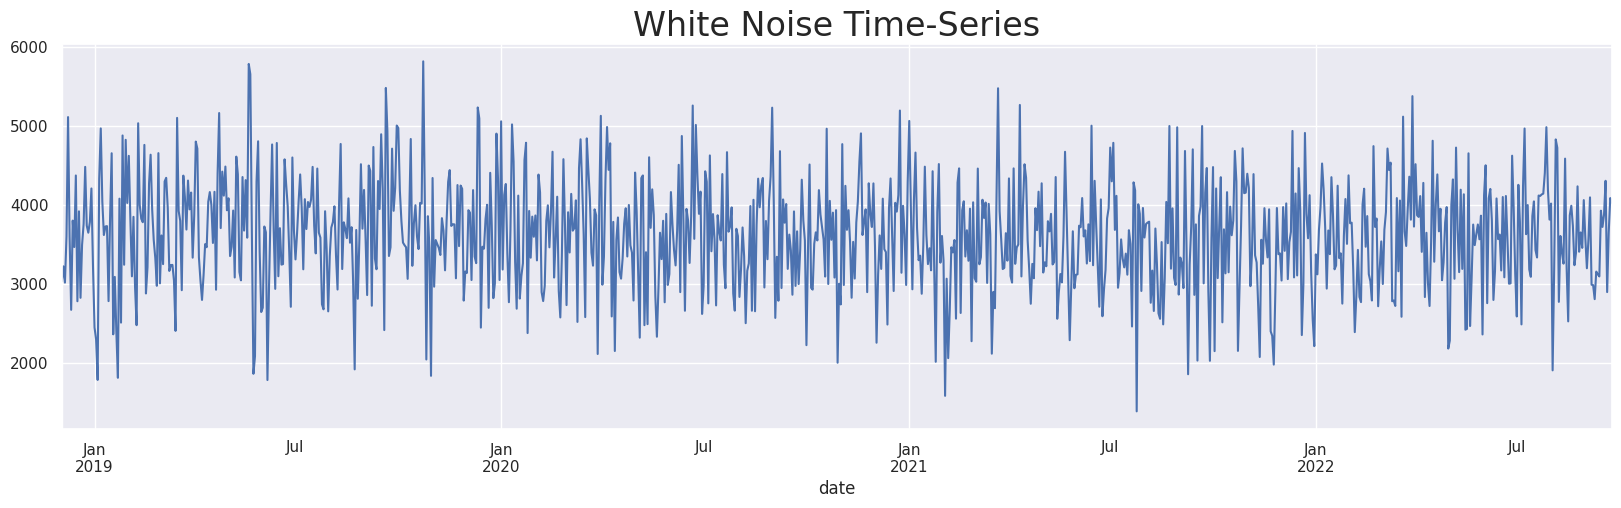

In [24]:
df.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

**df.market_value.plot(figsize=(20,5)):**

df.market_value selecciona la columna "market_value" del DataFrame df, que contiene los datos de los precios del índice S&P.
.plot() se utiliza para trazar la serie de tiempo.
figsize=(20,5) establece el tamaño de la figura del gráfico en 20 unidades de ancho y 5 unidades de alto.

**plt.title("S&P Prices", size=24):**

plt.title() establece el título del gráfico como "S&P Prices". El argumento size=24 controla el tamaño de la fuente del título.

**plt.ylim(0, 5000):**

plt.ylim() establece los límites del eje vertical (eje Y) del gráfico. En este caso, los límites se establecen en un rango de 0 a 5000 en el eje Y, lo que controla el rango visible en el gráfico.

**plt.show():**

plt.show() se utiliza para mostrar el gráfico en una ventana emergente. Después de ejecutar esta línea, se mostrará el gráfico de la serie de tiempo de los precios del índice S&P con el título y los límites configurados.

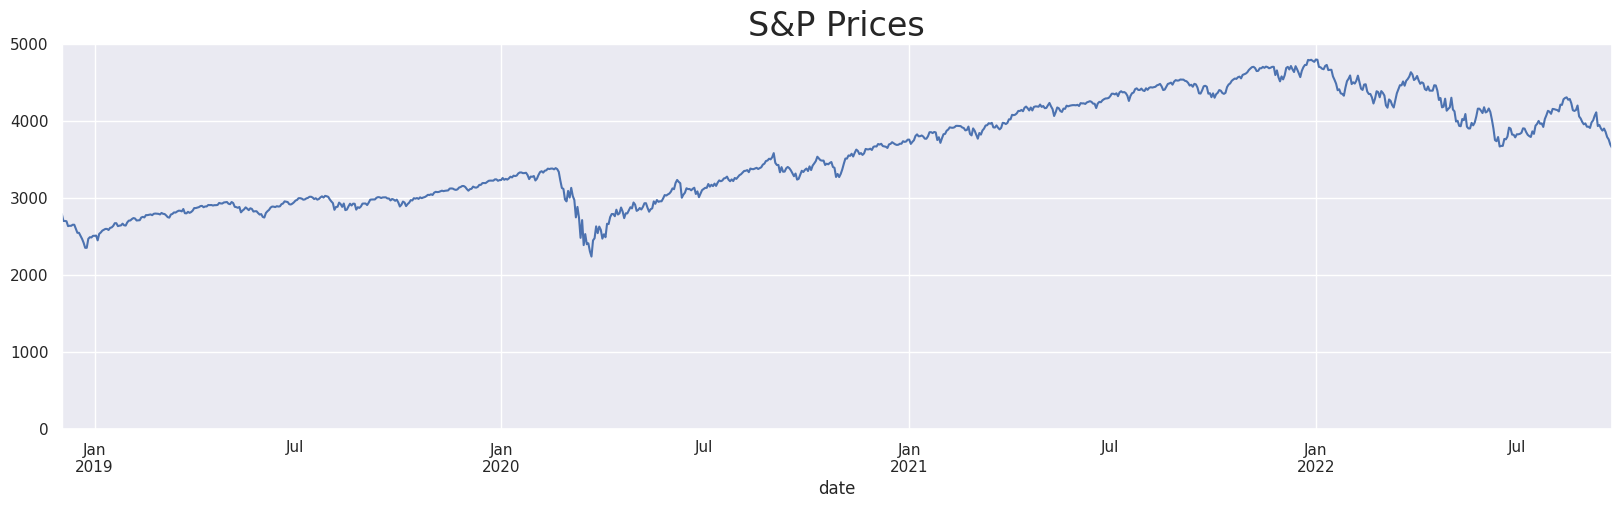

In [25]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size = 24)
plt.ylim(0,5000)
plt.show()

### Random Walk

**rw = pd.read_csv("df_comp (1).csv"):**

Esta línea carga los datos desde el archivo CSV "df_comp (1).csv" en un nuevo DataFrame llamado rw. Este paso es similar al que se realizó anteriormente al cargar los datos en el DataFrame df_comp.

**rw.date = pd.to_datetime(rw.date, dayfirst=True):**

Convierte la columna "date" en el DataFrame rw en objetos de tipo datetime, de manera similar a lo que se hizo en el DataFrame df_comp. El argumento dayfirst=True se utiliza para indicar que el formato de fecha en los datos es día-mes-año.

**rw.set_index("date", inplace=True):**

Establece la columna "date" como el índice del DataFrame rw, al igual que se hizo anteriormente con df_comp. Esto se hace para que los datos estén indexados por fechas, lo que facilita el análisis de series temporales.

**rw = rw.asfreq('b'):**

Establece la frecuencia de los datos en el DataFrame rw como "b", que representa días laborables (días hábiles). Esto significa que si faltan datos en un día laborable, se rellenarán con valores NaN (no disponibles), al igual que se hizo en el DataFrame df_comp.

In [27]:
rw = pd.read_csv("df_comp (1).csv")
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index("date", inplace = True)
rw = rw.asfreq('b')

In [33]:
rw.describe()

,ftse,dax,spx,nikkei
count,1245.000000,1245.000000,1245.000000,1245.000000
mean,7072.865867,13668.384585,3691.250659,25729.274013
std,566.716325,1681.478900,638.483493,3635.387496
min,4993.899902,8441.709961,2237.399902,16552.830078
25%,6837.399902,12401.200195,3066.909912,22418.150391
50%,7220.100098,13544.519531,3830.169922,26781.679688
75%,7471.500000,15365.139648,4207.270020,28437.769531
max,8014.299805,16469.750000,4796.560059,33753.328125


In [34]:
df['rw'] = rw[' dax ']

<ipython-input-34-adf07907b3d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rw'] = rw[' dax ']


Este código imprime las primeras cinco filas del DataFrame df

In [35]:
df.head()

,market_value,wn,rw
date,,,
2018-12-03,2790.370117,3032.891026,11465.459961
2018-12-04,2700.060059,3222.215713,11335.320312
2018-12-05,2700.060059,3016.445652,11200.240234
2018-12-06,2695.949951,3601.081798,10810.980469
2018-12-07,2633.080078,5109.393374,10788.089844


**df.rw.plot(figsize=(20,5)):**

df.rw selecciona la columna "rw" del DataFrame df y traza la serie de tiempo correspondiente.
figsize=(20,5) establece el tamaño de la figura del gráfico en 20 unidades de ancho y 5 unidades de alto.

**df.market_value.plot():**

df.market_value selecciona la columna "market_value" del DataFrame df y traza la serie de tiempo correspondiente.

**plt.title("Random Walk vs S&P", size=24):**

plt.title() establece el título del gráfico como "Random Walk vs S&P". El argumento size=24 controla el tamaño de la fuente del título.

**plt.show():**

plt.show() se utiliza para mostrar el gráfico en una ventana emergente. Después de ejecutar esta línea, se mostrará el gráfico que compara la serie de tiempo "rw" y "market_value" en una sola visualización.

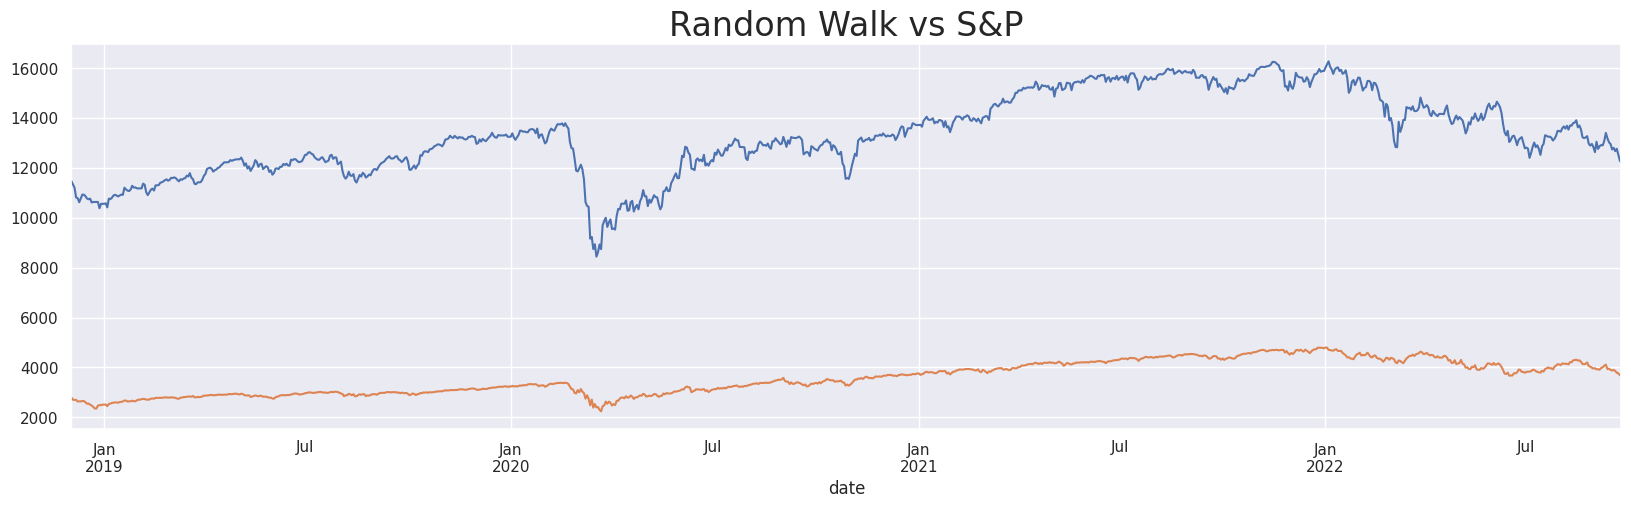

In [36]:
df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.show()

### Stationarity

La función sts.adfuller devuelve varios valores que contienen información sobre el resultado de la prueba ADF. Esto varia entre market value, wn, etc.

In [37]:
sts.adfuller(df.market_value)

(-1.7155957940816688,
 0.4230954970943094,
 13,
 982,
 {'1%': -3.4370266558635914,
  '5%': -2.864487711945291,
  '10%': -2.5683395116993872},
 10162.875103800623)

In [38]:
sts.adfuller(df.wn)

(-23.208641856605375,
 0.0,
 1,
 994,
 {'1%': -3.43694584277544,
  '5%': -2.8644520725172873,
  '10%': -2.5683205291305176},
 15503.371574101837)

In [39]:
sts.adfuller(df.rw)

(-1.8308133160889595,
 0.365274566016416,
 0,
 995,
 {'1%': -3.4369391965679257,
  '5%': -2.86444914142694,
  '10%': -2.5683189679553546},
 12817.325345037774)

### Seasonality

**s_dec_multiplicative = seasonal_decompose(df.market_value, model="multiplicative"):**

La función seasonal_decompose toma la serie de tiempo contenida en la columna "market_value" del DataFrame df como entrada y realiza una descomposición estacional utilizando el modelo "multiplicativo". El modelo "multiplicativo" se utiliza cuando la amplitud de la estacionalidad cambia a medida que la serie temporal crece.

**s_dec_multiplicative.plot():**

Luego de realizar la descomposición estacional, se utiliza el método .plot() para mostrar los componentes descompuestos (tendencia, estacionalidad y residuales) en un gráfico.

**plt.show():**

Finalmente, plt.show() se utiliza para mostrar el gráfico de la descomposición estacional.

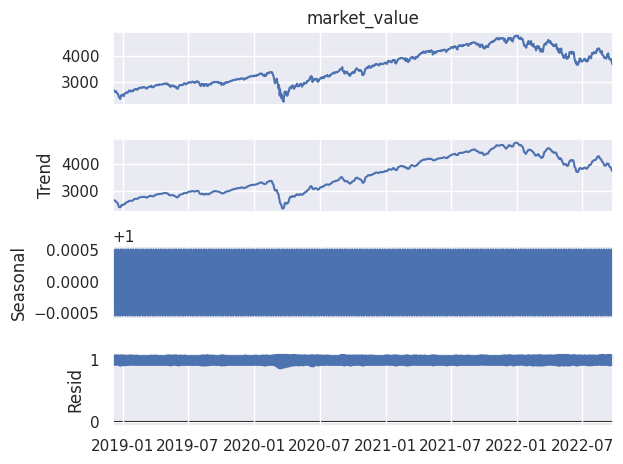

In [40]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

### ACF

**sgt.plot_acf(df.market_value, lags=40, zero=False):**

sgt.plot_acf() es una función que traza la función de autocorrelación (ACF) de la serie de tiempo especificada en su primer argumento, que en este caso es df.market_value.
El argumento lags establece la cantidad de rezagos que se mostrarán en el gráfico. En este caso, se mostrarán 40 rezagos.
El argumento zero se establece en False, lo que significa que no se mostrará el rezago cero en el gráfico.

**plt.title("ACF S&P", size=24):**

plt.title() establece el título del gráfico como "ACF S&P". El argumento size=24 controla el tamaño de la fuente del título.

**plt.show():**

plt.show() se utiliza para mostrar el gráfico de la función de autocorrelación en una ventana emergente.

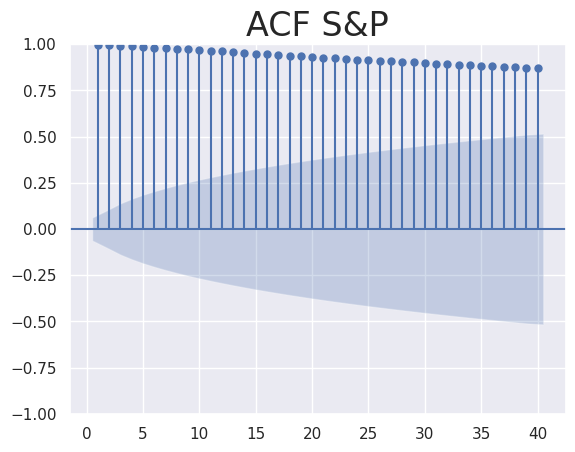

In [41]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.show()

### PACF

**sgt.plot_pacf(df.market_value, lags=40, zero=False, method='ols'):**

sgt.plot_pacf() es una función que traza la función de autocorrelación parcial (PACF) de la serie de tiempo especificada en su primer argumento, que en este caso es df.market_value.
El argumento lags establece la cantidad de rezagos que se mostrarán en el gráfico. En este caso, se mostrarán 40 rezagos.
El argumento zero se establece en False, lo que significa que no se mostrará el rezago cero en el gráfico.
El argumento method se establece como 'ols' (mínimos cuadrados ordinarios) para calcular la PACF. Este es uno de los métodos comunes para estimar la PACF.

**plt.title("PACF S&P", size=24):**

plt.title() establece el título del gráfico como "PACF S&P". El argumento size=24 controla el tamaño de la fuente del título.

**plt.show():**

plt.show() se utiliza para mostrar el gráfico de la función de autocorrelación parcial en una ventana emergente.

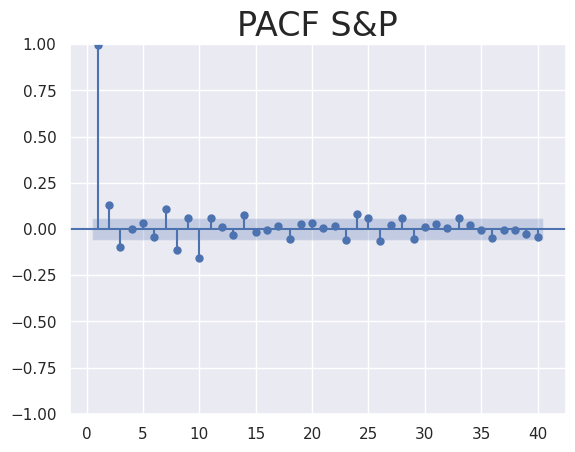

In [42]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()

**plt.title("PACF WN", size=24):**

plt.title() establece el título del gráfico como "PACF WN". El argumento size=24 controla el tamaño de la fuente del título.

**plt.show():**

plt.show() se utiliza para mostrar el gráfico de la función de autocorrelación parcial en una ventana emergente.

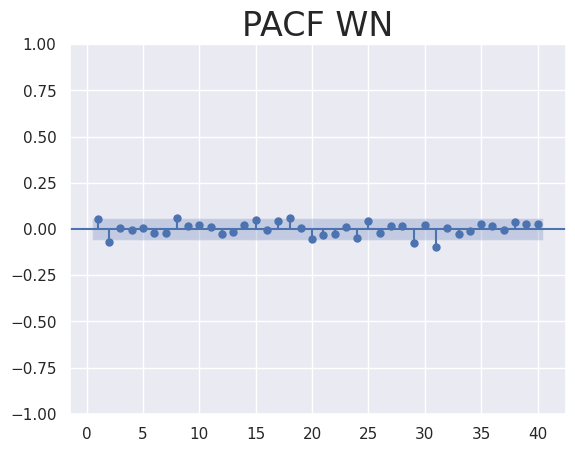

In [45]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF WN", size = 24)
plt.show()